In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Load the training and test data sets
train = pd.read_csv('/Users/matthewwong/Desktop/SEEM 4113 Project/train.csv')
test = pd.read_csv('/Users/matthewwong/Desktop/SEEM 4113 Project/test.csv')
train

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [4]:
# Create numpy arrays for use with scikit-learn
train_X = train.drop(['Id','Cover_Type'],axis=1).values
train_y = train.Cover_Type.values
test_X = test.drop('Id',axis=1).values

In [5]:
train_y

array([5, 5, 2, ..., 3, 3, 3])

In [6]:
standardizer = StandardScaler()
train_X_std = standardizer.fit(train_X)

In [7]:
# Split the training set into training and validation sets
x_train,x_test,y_train,y_test = train_test_split(train_X,train_y,test_size=0.2,random_state=0)

In [8]:
x_train.shape

(12096, 54)

In [9]:
y_train.shape

(12096,)

In [10]:
from keras import models
from keras import layers

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

In [11]:
network = models.Sequential()
network.add(layers.Dense(units = 16, activation="relu",input_shape = [x_train.shape[1]],))
network.add(layers.Dense(units=8, activation="softmax"))

In [12]:
from keras.utils.np_utils import to_categorical

In [13]:
train_one_hot = to_categorical(y_train, num_classes=8)
test_one_hot = to_categorical(y_test,num_classes=8)

In [14]:
y_test

array([4, 4, 4, ..., 7, 3, 3])

In [15]:
test_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
test_one_hot.shape

(3024, 8)

In [17]:
network.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = network.fit(x_train,train_one_hot,
                     epochs = 10000,verbose = 0,batch_size = 100,
                     validation_data=(x_test, test_one_hot))

In [19]:
history.history

{'val_loss': [37.17773809887114,
  6.08102919689562,
  2.481094487129696,
  2.859961353281818,
  2.436892635292477,
  2.0214539826231657,
  2.157519556542553,
  1.901142939373299,
  2.792366876804009,
  1.960461090796839,
  2.363063251846051,
  1.8493658862416706,
  2.874606481304875,
  2.5905056542189664,
  1.901853738638459,
  2.4047823983525474,
  2.0778042237279277,
  2.276482829971919,
  1.8403216945746588,
  1.8781076144604456,
  1.9336343555854112,
  2.5344232560465576,
  2.137737341974147,
  2.1021245681734944,
  1.837131709964187,
  1.8093749062409477,
  2.03608000877673,
  1.965827861475566,
  1.8175075120396085,
  2.0107729182672247,
  1.8420558472474415,
  2.4939710113106583,
  1.9646999872235393,
  2.042231661932809,
  2.076317752952929,
  1.7837483465040802,
  1.7823711297814808,
  2.232857580538149,
  2.213098030872446,
  1.7606895072434945,
  2.0597443962223316,
  2.4538729345356978,
  1.9884552346966253,
  1.7539981409670815,
  2.3607919317073924,
  2.0623254049076607,

In [20]:
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]

In [21]:
epoch_count = range(1, len(train_loss)+1)
epoch_count

range(1, 10001)

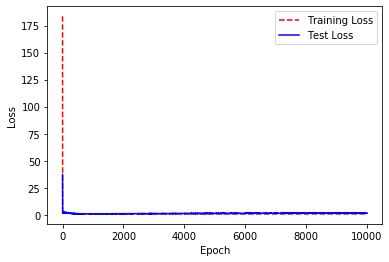

In [22]:
import matplotlib.pyplot as plt
plt.plot(epoch_count, train_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss","Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

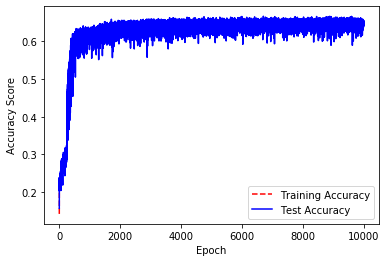

In [23]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training Accuracy","Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()

In [24]:
predicted_type = network.predict(test_X)

In [25]:
predicted_type

array([[0.0000000e+00, 3.7812430e-02, 9.3096405e-01, ..., 3.1223487e-02,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 8.7503791e-02, 8.5771763e-01, ..., 5.4778531e-02,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.7058870e-02, 8.3010972e-01, ..., 7.2831407e-02,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 1.4061341e-04, 5.7415427e-03, ..., 6.9423489e-02,
        4.6854094e-01, 4.4612584e-08],
       [0.0000000e+00, 1.4202374e-04, 5.7854271e-03, ..., 7.0080064e-02,
        4.6834016e-01, 4.5022066e-08],
       [0.0000000e+00, 1.3965245e-04, 5.7115834e-03, ..., 6.8975955e-02,
        4.6867689e-01, 4.4333433e-08]], dtype=float32)

In [26]:
print("Predicted class: {}\n".format(predicted_type))

Predicted class: [[0.0000000e+00 3.7812430e-02 9.3096405e-01 ... 3.1223487e-02
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 8.7503791e-02 8.5771763e-01 ... 5.4778531e-02
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 9.7058870e-02 8.3010972e-01 ... 7.2831407e-02
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 1.4061341e-04 5.7415427e-03 ... 6.9423489e-02
  4.6854094e-01 4.4612584e-08]
 [0.0000000e+00 1.4202374e-04 5.7854271e-03 ... 7.0080064e-02
  4.6834016e-01 4.5022066e-08]
 [0.0000000e+00 1.3965245e-04 5.7115834e-03 ... 6.8975955e-02
  4.6867689e-01 4.4333433e-08]]



In [27]:
y_classes = predicted_type.argmax(axis=-1)

In [28]:
y_classes

array([2, 2, 2, ..., 6, 6, 6])

In [29]:
# Write to CSV
pd.DataFrame({'Id':test.Id.values,'Cover_Type':y_classes}).sort_index(ascending=False,axis=1).to_csv('sampleSubmission.csv',index = False)